In [1]:
from confirm.outlaw.nb_util import setup_nb

setup_nb(autoreload=False)

import matplotlib.pyplot as plt
import scipy.stats
import jax
import jax.numpy as jnp
import numpy as np

import confirm.imprint as ip
import confirm.models.fisher_exact as fisher

## Binomial two class

In [8]:
K = 2**12
lam = 0.05
for n in range(3, 15):
    g = ip.cartesian_grid(
        [-3, -3], [3, 3], n=[20, 20], null_hypos=[ip.hypo("theta1 < theta0")]
    )
    rej_df = ip.validate(fisher.FisherExact, g, lam, K=K, model_kwargs=dict(n=n))
    print(f"n_arm_samples={n} max(tie)={rej_df['tie_est'].max():.4f}")

n_arm_samples=3 max(tie)=0.0000
n_arm_samples=4 max(tie)=0.0044
n_arm_samples=5 max(tie)=0.0095
n_arm_samples=6 max(tie)=0.0210
n_arm_samples=7 max(tie)=0.0137
n_arm_samples=8 max(tie)=0.0178
n_arm_samples=9 max(tie)=0.0173
n_arm_samples=10 max(tie)=0.0237
n_arm_samples=11 max(tie)=0.0295
n_arm_samples=12 max(tie)=0.0359
n_arm_samples=13 max(tie)=0.0266
n_arm_samples=14 max(tie)=0.0266


In [13]:
K = 2**12
lam = 0.05

for n in range(3, 15):
    g = ip.cartesian_grid(
        [-1, -1], [1, 1], n=[1, 1], null_hypos=[ip.hypo("theta1 < theta0")]
    )
    rej_df = ip.validate(fisher.FisherExact, g, lam, K=K, model_kwargs=dict(n=n))
    print(rej_df["tie_est"].max())
    rej_df = ip.validate(fisher.BoschlooExact, g, lam, K=K, model_kwargs=dict(n=n))
    print(rej_df["tie_est"].max())

0.0
0.015869140625
0.00341796875
0.03369140625
0.009033203125
0.0263671875
0.0205078125
0.031005859375
0.010498046875
0.037353515625
0.0107421875
0.03857421875
0.016845703125
0.04931640625
0.021240234375
0.04345703125
0.033447265625
0.047119140625
0.036376953125
0.044921875
0.018798828125
0.034423828125
0.019287109375
0.047119140625


In [19]:
text = """
0.0
0.015869140625
0.00341796875
0.03369140625
0.009033203125
0.0263671875
0.0205078125
0.031005859375
0.010498046875
0.037353515625
0.0107421875
0.03857421875
0.016845703125
0.04931640625
0.021240234375
0.04345703125
0.033447265625
0.047119140625
0.036376953125
0.044921875
0.018798828125
0.034423828125
0.019287109375
0.047119140625
"""
data = np.concatenate(
    (
        np.arange(3, 15)[:, None],
        np.array([float(f) for f in text.split("\n")[1:-1]]).reshape((-1, 2)),
    ),
    axis=1,
)
for i in range(data.shape[0]):
    print(
        f"n={int(data[i,0])} max(fisher)={data[i, 1]:.4f} max(boschloo)={data[i, 2]:.4f}"
    )

n=3 max(fisher)=0.0000 max(boschloo)=0.0159
n=4 max(fisher)=0.0034 max(boschloo)=0.0337
n=5 max(fisher)=0.0090 max(boschloo)=0.0264
n=6 max(fisher)=0.0205 max(boschloo)=0.0310
n=7 max(fisher)=0.0105 max(boschloo)=0.0374
n=8 max(fisher)=0.0107 max(boschloo)=0.0386
n=9 max(fisher)=0.0168 max(boschloo)=0.0493
n=10 max(fisher)=0.0212 max(boschloo)=0.0435
n=11 max(fisher)=0.0334 max(boschloo)=0.0471
n=12 max(fisher)=0.0364 max(boschloo)=0.0449
n=13 max(fisher)=0.0188 max(boschloo)=0.0344
n=14 max(fisher)=0.0193 max(boschloo)=0.0471


In [31]:
model = FisherExact(0, 10, n=10)
np.random.seed(0)
theta = np.random.rand(5, 2)
null_truth = np.ones((5, 1), dtype=bool)
np.testing.assert_allclose(
    model._sim_scipy(model.samples[0:10], theta, null_truth),
    model._sim_jax(model.samples[0:10], theta, null_truth),
)

In [ ]:
g = ip.cartesian_grid(
    [-1, -1], [1, 1], n=[50, 50], null_hypos=[ip.hypo("theta1 < theta0")]
)
# ip.grid.plot_grid(g)
# plt.show()

In [ ]:
n = 10
K = 2**12
rej_df = ip.validate(FisherExact, g, 0.0286, K=K, model_kwargs=dict(n_arm_samples=n))

KeyError: 'theta1'

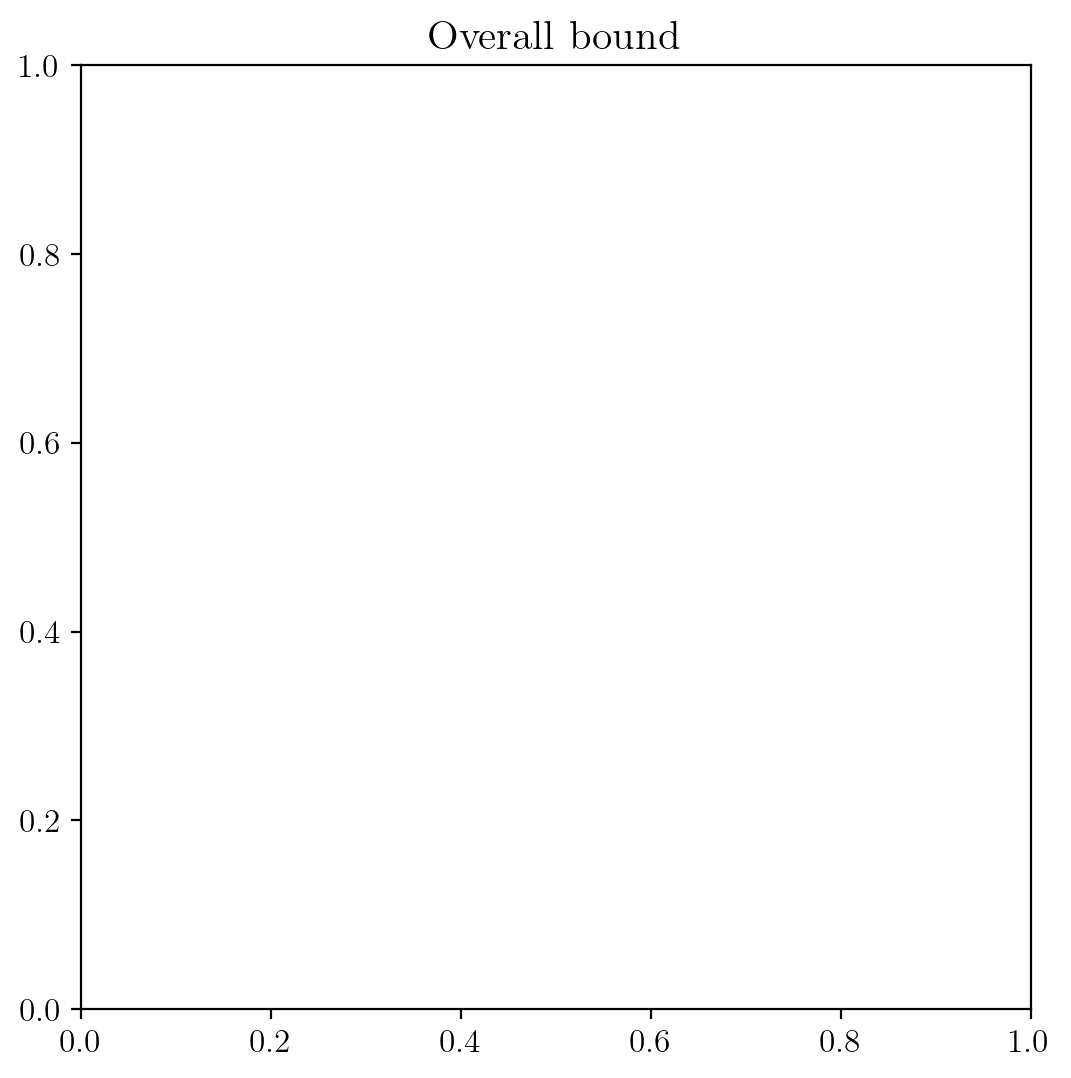

In [4]:
import confirm.imprint.summary

ip.summary.summarize_validate(g, rej_df)

## Tuning Fisher Exact

In [3]:
n = 15
alpha = 0.05
g = ip.cartesian_grid(
    [-1, -1], [1, 1], n=[4, 4], null_hypos=[ip.hypo("theta1 < theta0")]
)
iter, reports, ada = ip.ada_tune(
    fisher.FisherExact,
    g=g,
    alpha=alpha,
    model_kwargs=dict(n=n),
    grid_target=0.0001,
    bias_target=0.0001,
    std_target=0.0001,
    iter_size=2**11,
    n_K_double=6,
)

{
    'i': 1,
    'bias_tie': '0.000879',
    'std_tie': '0.001751',
    'spread_tie': '0.004272',
    'grid_cost': '0.042379',
    'lamss': '0.013419',
    'min(B_lamss)': '0.012664',
    'max(B_lamss)': '0.025087',
    'tie_{k}(lamss)': '0.007202',
    'tie + slack': '0.050460',
    'n_impossible': 0,
    'runtime_convergence_check': '0.042124',
    'runtime_refine_deepen': '0.451024',
    'runtime_processing': '1.031858',
    'n_refine': 7,
    'n_deepen': 3,
    'n_complete': 0
}

{
    'i': 2,
    'bias_tie': '-0.001973',
    'std_tie': '0.003114',
    'spread_tie': '0.011353',
    'grid_cost': '0.029474',
    'lamss': '0.032798',
    'min(B_lamss)': '0.030216',
    'max(B_lamss)': '0.054323',
    'tie_{k}(lamss)': '0.016235',
    'tie + slack': '0.043737',
    'n_impossible': 0,
    'runtime_convergence_check': '0.041970',
    'runtime_refine_deepen': '0.190798',
    'runtime_processing': '1.557088',
    'n_refine': 15,
    'n_deepen': 12,
    'n_complete': 0
}

{
    'i': 3,
    'bias_tie': '-0.001738',
    'std_tie': '0.003253',
    'spread_tie': '0.008179',
    'grid_cost': '0.017489',
    'lamss': '0.064068',
    'min(B_lamss)': '0.064068',
    'max(B_lamss)': '0.069710',
    'tie_{k}(lamss)': '0.026855',
    'tie + slack': '0.042606',
    'n_impossible': 0,
    'runtime_convergence_check': '0.038121',
    'runtime_refine_deepen': '0.200238',
    'runtime_processing': '2.969002',
    'n_refine': 30,
    'n_deepen': 34,
    'n_complete': 0
}

{
    'i': 4,
    'bias_tie': '-0.000313',
    'std_tie': '0.001516',
    'spread_tie': '0.007812',
    'grid_cost': '0.009524',
    'lamss': '0.069710',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.071555',
    'tie_{k}(lamss)': '0.034790',
    'tie + slack': '0.044002',
    'n_impossible': 0,
    'runtime_convergence_check': '0.039789',
    'runtime_refine_deepen': '0.201861',
    'runtime_processing': '9.718981',
    'n_refine': 63,
    'n_deepen': 75,
    'n_complete': 0
}

{
    'i': 5,
    'bias_tie': '0.003333',
    'std_tie': '0.005061',
    'spread_tie': '0.011108',
    'grid_cost': '0.004986',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.071555',
    'tie_{k}(lamss)': '0.039795',
    'tie + slack': '0.048113',
    'n_impossible': 0,
    'runtime_convergence_check': '0.061775',
    'runtime_refine_deepen': '0.235101',
    'runtime_processing': '18.447596',
    'n_refine': 128,
    'n_deepen': 167,
    'n_complete': 0
}

{
    'i': 6,
    'bias_tie': '0.001006',
    'std_tie': '0.003594',
    'spread_tie': '0.018555',
    'grid_cost': '0.002547',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.040771',
    'tie + slack': '0.044325',
    'n_impossible': 0,
    'runtime_convergence_check': '0.041379',
    'runtime_refine_deepen': '0.192234',
    'runtime_processing': '40.967071',
    'n_refine': 193,
    'n_deepen': 422,
    'n_complete': 0
}

{
    'i': 7,
    'bias_tie': '0.000295',
    'std_tie': '0.003639',
    'spread_tie': '0.020752',
    'grid_cost': '0.001287',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.043213',
    'tie + slack': '0.044795',
    'n_impossible': 0,
    'runtime_convergence_check': '0.043032',
    'runtime_refine_deepen': '0.211424',
    'runtime_processing': '56.119217',
    'n_refine': 526,
    'n_deepen': 498,
    'n_complete': 0
}

{
    'i': 8,
    'bias_tie': '0.000007',
    'std_tie': '0.003196',
    'spread_tie': '0.020874',
    'grid_cost': '0.000647',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.043213',
    'tie + slack': '0.043867',
    'n_impossible': 0,
    'runtime_convergence_check': '0.046573',
    'runtime_refine_deepen': '0.200397',
    'runtime_processing': '37.701024',
    'n_refine': 939,
    'n_deepen': 85,
    'n_complete': 0
}

{
    'i': 9,
    'bias_tie': '-0.000547',
    'std_tie': '0.002145',
    'spread_tie': '0.009155',
    'grid_cost': '0.000642',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041260',
    'tie + slack': '0.041355',
    'n_impossible': 0,
    'runtime_convergence_check': '0.050261',
    'runtime_refine_deepen': '0.200480',
    'runtime_processing': '41.304036',
    'n_refine': 968,
    'n_deepen': 56,
    'n_complete': 0
}

{
    'i': 10,
    'bias_tie': '0.000132',
    'std_tie': '0.002106',
    'spread_tie': '0.020264',
    'grid_cost': '0.000324',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.044189',
    'tie + slack': '0.044645',
    'n_impossible': 0,
    'runtime_convergence_check': '0.053904',
    'runtime_refine_deepen': '0.211060',
    'runtime_processing': '35.263663',
    'n_refine': 775,
    'n_deepen': 249,
    'n_complete': 0
}

{
    'i': 11,
    'bias_tie': '0.000129',
    'std_tie': '0.002160',
    'spread_tie': '0.020874',
    'grid_cost': '0.000324',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.043213',
    'tie + slack': '0.043666',
    'n_impossible': 0,
    'runtime_convergence_check': '0.056276',
    'runtime_refine_deepen': '0.205034',
    'runtime_processing': '36.715167',
    'n_refine': 771,
    'n_deepen': 253,
    'n_complete': 0
}

{
    'i': 12,
    'bias_tie': '0.000088',
    'std_tie': '0.002075',
    'spread_tie': '0.020508',
    'grid_cost': '0.000324',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041626',
    'tie + slack': '0.042038',
    'n_impossible': 0,
    'runtime_convergence_check': '0.060747',
    'runtime_refine_deepen': '0.206178',
    'runtime_processing': '33.679565',
    'n_refine': 685,
    'n_deepen': 339,
    'n_complete': 0
}

{
    'i': 13,
    'bias_tie': '0.000090',
    'std_tie': '0.001924',
    'spread_tie': '0.018921',
    'grid_cost': '0.000325',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.042725',
    'tie + slack': '0.043140',
    'n_impossible': 0,
    'runtime_convergence_check': '0.062608',
    'runtime_refine_deepen': '0.206840',
    'runtime_processing': '36.914614',
    'n_refine': 791,
    'n_deepen': 233,
    'n_complete': 0
}

{
    'i': 14,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.064695',
    'runtime_refine_deepen': '0.206145',
    'runtime_processing': '49.090385',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 15,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.069927',
    'runtime_refine_deepen': '0.207556',
    'runtime_processing': '37.920621',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 16,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.072209',
    'runtime_refine_deepen': '0.207381',
    'runtime_processing': '47.933845',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 17,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.078742',
    'runtime_refine_deepen': '0.200307',
    'runtime_processing': '47.071698',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 18,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.081507',
    'runtime_refine_deepen': '0.192350',
    'runtime_processing': '48.655912',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 19,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.087458',
    'runtime_refine_deepen': '0.202057',
    'runtime_processing': '47.030656',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 20,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.085161',
    'runtime_refine_deepen': '0.192263',
    'runtime_processing': '46.978454',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 21,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.092588',
    'runtime_refine_deepen': '0.192998',
    'runtime_processing': '47.209009',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 22,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.096143',
    'runtime_refine_deepen': '0.192349',
    'runtime_processing': '46.980015',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 23,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.099393',
    'runtime_refine_deepen': '0.194246',
    'runtime_processing': '46.685421',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 24,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.101410',
    'runtime_refine_deepen': '0.192539',
    'runtime_processing': '46.802403',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 25,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.107008',
    'runtime_refine_deepen': '0.194231',
    'runtime_processing': '46.838144',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 26,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.112630',
    'runtime_refine_deepen': '0.193360',
    'runtime_processing': '46.651307',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 27,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.115285',
    'runtime_refine_deepen': '0.192279',
    'runtime_processing': '46.624938',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 28,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.115533',
    'runtime_refine_deepen': '0.192094',
    'runtime_processing': '47.007909',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 29,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.120707',
    'runtime_refine_deepen': '0.191770',
    'runtime_processing': '47.063036',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 30,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.129277',
    'runtime_refine_deepen': '0.191762',
    'runtime_processing': '46.725093',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 31,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.123159',
    'runtime_refine_deepen': '0.197783',
    'runtime_processing': '47.431077',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 32,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.130103',
    'runtime_refine_deepen': '0.193237',
    'runtime_processing': '47.353431',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 33,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.145732',
    'runtime_refine_deepen': '0.210304',
    'runtime_processing': '47.968457',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 34,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.149381',
    'runtime_refine_deepen': '0.194994',
    'runtime_processing': '47.718540',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 35,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.147311',
    'runtime_refine_deepen': '0.203331',
    'runtime_processing': '46.951168',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 36,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.154757',
    'runtime_refine_deepen': '0.197124',
    'runtime_processing': '47.017158',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 37,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.154681',
    'runtime_refine_deepen': '0.194318',
    'runtime_processing': '46.516646',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 38,
    'bias_tie': '0.000134',
    'std_tie': '0.002167',
    'spread_tie': '0.020874',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.044922',
    'tie + slack': '0.045057',
    'n_impossible': 0,
    'runtime_convergence_check': '0.154994',
    'runtime_refine_deepen': '0.193782',
    'runtime_processing': '23.523734',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 39,
    'bias_tie': '0.000134',
    'std_tie': '0.002167',
    'spread_tie': '0.020874',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.044922',
    'tie + slack': '0.045057',
    'n_impossible': 0,
    'runtime_convergence_check': '0.162792',
    'runtime_refine_deepen': '0.193484',
    'runtime_processing': '23.055233',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 40,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.159672',
    'runtime_refine_deepen': '0.194885',
    'runtime_processing': '46.680618',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 41,
    'bias_tie': '0.000134',
    'std_tie': '0.002167',
    'spread_tie': '0.020874',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.044922',
    'tie + slack': '0.045057',
    'n_impossible': 0,
    'runtime_convergence_check': '0.156523',
    'runtime_refine_deepen': '0.193406',
    'runtime_processing': '23.013617',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 42,
    'bias_tie': '0.000142',
    'std_tie': '0.002213',
    'spread_tie': '0.021240',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.045166',
    'tie + slack': '0.045309',
    'n_impossible': 0,
    'runtime_convergence_check': '0.163572',
    'runtime_refine_deepen': '0.193432',
    'runtime_processing': '23.058815',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 43,
    'bias_tie': '0.000144',
    'std_tie': '0.002228',
    'spread_tie': '0.021362',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.045288',
    'tie + slack': '0.045433',
    'n_impossible': 0,
    'runtime_convergence_check': '0.161159',
    'runtime_refine_deepen': '0.193690',
    'runtime_processing': '23.090288',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 44,
    'bias_tie': '0.000142',
    'std_tie': '0.002213',
    'spread_tie': '0.021240',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.045166',
    'tie + slack': '0.045309',
    'n_impossible': 0,
    'runtime_convergence_check': '0.154801',
    'runtime_refine_deepen': '0.193826',
    'runtime_processing': '23.105537',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 45,
    'bias_tie': '0.000090',
    'std_tie': '0.002326',
    'spread_tie': '0.023071',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042160',
    'n_impossible': 0,
    'runtime_convergence_check': '0.153296',
    'runtime_refine_deepen': '0.196473',
    'runtime_processing': '46.482300',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 46,
    'bias_tie': '0.000142',
    'std_tie': '0.002213',
    'spread_tie': '0.021240',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.045166',
    'tie + slack': '0.045309',
    'n_impossible': 0,
    'runtime_convergence_check': '0.162076',
    'runtime_refine_deepen': '0.195684',
    'runtime_processing': '23.275614',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 47,
    'bias_tie': '0.000142',
    'std_tie': '0.002167',
    'spread_tie': '0.020752',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.045044',
    'tie + slack': '0.045187',
    'n_impossible': 0,
    'runtime_convergence_check': '0.155274',
    'runtime_refine_deepen': '0.194386',
    'runtime_processing': '23.211793',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 48,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044922',
    'tie + slack': '0.045062',
    'n_impossible': 0,
    'runtime_convergence_check': '0.156052',
    'runtime_refine_deepen': '0.195681',
    'runtime_processing': '23.179364',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 49,
    'bias_tie': '0.000142',
    'std_tie': '0.002144',
    'spread_tie': '0.020508',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044922',
    'tie + slack': '0.045065',
    'n_impossible': 0,
    'runtime_convergence_check': '0.160885',
    'runtime_refine_deepen': '0.194464',
    'runtime_processing': '23.155131',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 50,
    'bias_tie': '0.000093',
    'std_tie': '0.002316',
    'spread_tie': '0.022949',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042163',
    'n_impossible': 0,
    'runtime_convergence_check': '0.162379',
    'runtime_refine_deepen': '0.195357',
    'runtime_processing': '46.579218',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 51,
    'bias_tie': '0.000137',
    'std_tie': '0.002113',
    'spread_tie': '0.020264',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044922',
    'tie + slack': '0.045060',
    'n_impossible': 0,
    'runtime_convergence_check': '0.161862',
    'runtime_refine_deepen': '0.199712',
    'runtime_processing': '23.191572',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 52,
    'bias_tie': '0.000137',
    'std_tie': '0.002113',
    'spread_tie': '0.020264',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044922',
    'tie + slack': '0.045060',
    'n_impossible': 0,
    'runtime_convergence_check': '0.166515',
    'runtime_refine_deepen': '0.196213',
    'runtime_processing': '23.275941',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 53,
    'bias_tie': '0.000139',
    'std_tie': '0.002128',
    'spread_tie': '0.020386',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044922',
    'tie + slack': '0.045062',
    'n_impossible': 0,
    'runtime_convergence_check': '0.168157',
    'runtime_refine_deepen': '0.195796',
    'runtime_processing': '23.144317',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 54,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044922',
    'tie + slack': '0.045062',
    'n_impossible': 0,
    'runtime_convergence_check': '0.172971',
    'runtime_refine_deepen': '0.193248',
    'runtime_processing': '23.140400',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 55,
    'bias_tie': '0.000093',
    'std_tie': '0.002316',
    'spread_tie': '0.022949',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042163',
    'n_impossible': 0,
    'runtime_convergence_check': '0.165338',
    'runtime_refine_deepen': '0.196568',
    'runtime_processing': '47.018882',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 56,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044922',
    'tie + slack': '0.045062',
    'n_impossible': 0,
    'runtime_convergence_check': '0.163569',
    'runtime_refine_deepen': '0.195999',
    'runtime_processing': '23.319479',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 57,
    'bias_tie': '0.000146',
    'std_tie': '0.002174',
    'spread_tie': '0.020752',
    'grid_cost': '0.000003',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.045044',
    'tie + slack': '0.045193',
    'n_impossible': 0,
    'runtime_convergence_check': '0.160973',
    'runtime_refine_deepen': '0.193038',
    'runtime_processing': '23.014193',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 58,
    'bias_tie': '0.000105',
    'std_tie': '0.001848',
    'spread_tie': '0.017944',
    'grid_cost': '0.000003',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044922',
    'tie + slack': '0.045029',
    'n_impossible': 0,
    'runtime_convergence_check': '0.171776',
    'runtime_refine_deepen': '0.197698',
    'runtime_processing': '23.169584',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 59,
    'bias_tie': '0.000144',
    'std_tie': '0.002205',
    'spread_tie': '0.021118',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.045044',
    'tie + slack': '0.045189',
    'n_impossible': 0,
    'runtime_convergence_check': '0.170942',
    'runtime_refine_deepen': '0.196945',
    'runtime_processing': '23.052516',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 60,
    'bias_tie': '0.000093',
    'std_tie': '0.002316',
    'spread_tie': '0.022949',
    'grid_cost': '0.000322',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.042163',
    'n_impossible': 0,
    'runtime_convergence_check': '0.166755',
    'runtime_refine_deepen': '0.196427',
    'runtime_processing': '46.635834',
    'n_refine': 1024,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 61,
    'bias_tie': '0.000146',
    'std_tie': '0.002197',
    'spread_tie': '0.020996',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.045166',
    'tie + slack': '0.045314',
    'n_impossible': 0,
    'runtime_convergence_check': '0.164542',
    'runtime_refine_deepen': '0.194329',
    'runtime_processing': '23.415360',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 62,
    'bias_tie': '0.000144',
    'std_tie': '0.002182',
    'spread_tie': '0.020874',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.045044',
    'tie + slack': '0.045189',
    'n_impossible': 0,
    'runtime_convergence_check': '0.175006',
    'runtime_refine_deepen': '0.197968',
    'runtime_processing': '23.743942',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 63,
    'bias_tie': '0.000144',
    'std_tie': '0.002159',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.045044',
    'tie + slack': '0.045189',
    'n_impossible': 0,
    'runtime_convergence_check': '0.176777',
    'runtime_refine_deepen': '0.206818',
    'runtime_processing': '23.373734',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 64,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.165502',
    'runtime_refine_deepen': '0.194918',
    'runtime_processing': '23.314862',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 65,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.157764',
    'runtime_refine_deepen': '0.194808',
    'runtime_processing': '23.159263',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 66,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.162433',
    'runtime_refine_deepen': '0.194336',
    'runtime_processing': '22.408773',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 67,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.159387',
    'runtime_refine_deepen': '0.200551',
    'runtime_processing': '22.458445',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 68,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.157076',
    'runtime_refine_deepen': '0.200172',
    'runtime_processing': '22.643578',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 69,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.166554',
    'runtime_refine_deepen': '0.199967',
    'runtime_processing': '22.698102',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 70,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.159901',
    'runtime_refine_deepen': '0.194712',
    'runtime_processing': '23.170270',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 71,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.156229',
    'runtime_refine_deepen': '0.198292',
    'runtime_processing': '22.597733',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 72,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.158831',
    'runtime_refine_deepen': '0.200276',
    'runtime_processing': '23.115386',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 73,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.170640',
    'runtime_refine_deepen': '0.199547',
    'runtime_processing': '23.019914',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 74,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.148442',
    'runtime_refine_deepen': '0.194111',
    'runtime_processing': '22.307890',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 75,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.157378',
    'runtime_refine_deepen': '0.195811',
    'runtime_processing': '22.766660',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 76,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.155200',
    'runtime_refine_deepen': '0.200152',
    'runtime_processing': '23.616583',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 77,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.158042',
    'runtime_refine_deepen': '0.197553',
    'runtime_processing': '22.297538',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 78,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.161471',
    'runtime_refine_deepen': '0.197029',
    'runtime_processing': '22.935089',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 79,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.150291',
    'runtime_refine_deepen': '0.210053',
    'runtime_processing': '22.343534',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 80,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.152972',
    'runtime_refine_deepen': '0.199482',
    'runtime_processing': '22.311878',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 81,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.150966',
    'runtime_refine_deepen': '0.196578',
    'runtime_processing': '22.455102',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 82,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.145094',
    'runtime_refine_deepen': '0.194081',
    'runtime_processing': '22.552116',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 83,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.152651',
    'runtime_refine_deepen': '0.197978',
    'runtime_processing': '22.475863',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 84,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.144120',
    'runtime_refine_deepen': '0.196391',
    'runtime_processing': '22.339850',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 85,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.150498',
    'runtime_refine_deepen': '0.216893',
    'runtime_processing': '22.603753',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 86,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.133122',
    'runtime_refine_deepen': '0.193923',
    'runtime_processing': '22.462520',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 87,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.136559',
    'runtime_refine_deepen': '0.209062',
    'runtime_processing': '22.987518',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 88,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.141289',
    'runtime_refine_deepen': '0.202697',
    'runtime_processing': '22.399378',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 89,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.125349',
    'runtime_refine_deepen': '0.195850',
    'runtime_processing': '22.443651',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 90,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.131973',
    'runtime_refine_deepen': '0.193106',
    'runtime_processing': '22.741622',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 91,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.144142',
    'runtime_refine_deepen': '0.202167',
    'runtime_processing': '22.855349',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 92,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.134604',
    'runtime_refine_deepen': '0.199336',
    'runtime_processing': '22.667119',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 93,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.132332',
    'runtime_refine_deepen': '0.195439',
    'runtime_processing': '22.413373',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 94,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.129908',
    'runtime_refine_deepen': '0.196031',
    'runtime_processing': '22.461628',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 95,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.127669',
    'runtime_refine_deepen': '0.195409',
    'runtime_processing': '22.461689',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 96,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.126552',
    'runtime_refine_deepen': '0.195839',
    'runtime_processing': '22.817547',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 97,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.131712',
    'runtime_refine_deepen': '0.195211',
    'runtime_processing': '22.510035',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 98,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.132030',
    'runtime_refine_deepen': '0.195509',
    'runtime_processing': '22.387099',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 99,
    'bias_tie': '0.000139',
    'std_tie': '0.002151',
    'spread_tie': '0.020630',
    'grid_cost': '0.000001',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.084291',
    'tie_{k}(lamss)': '0.044800',
    'tie + slack': '0.044940',
    'n_impossible': 0,
    'runtime_convergence_check': '0.127374',
    'runtime_refine_deepen': '0.195270',
    'runtime_processing': '22.403607',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
g_ada = ip.Grid(ada.db.get_all()).active()
df = g_ada.df
lamss = df["lams"].min()
rej_df = ip.validate(fisher.FisherExact, g_ada, lamss, K=K, model_kwargs=dict(n=n))

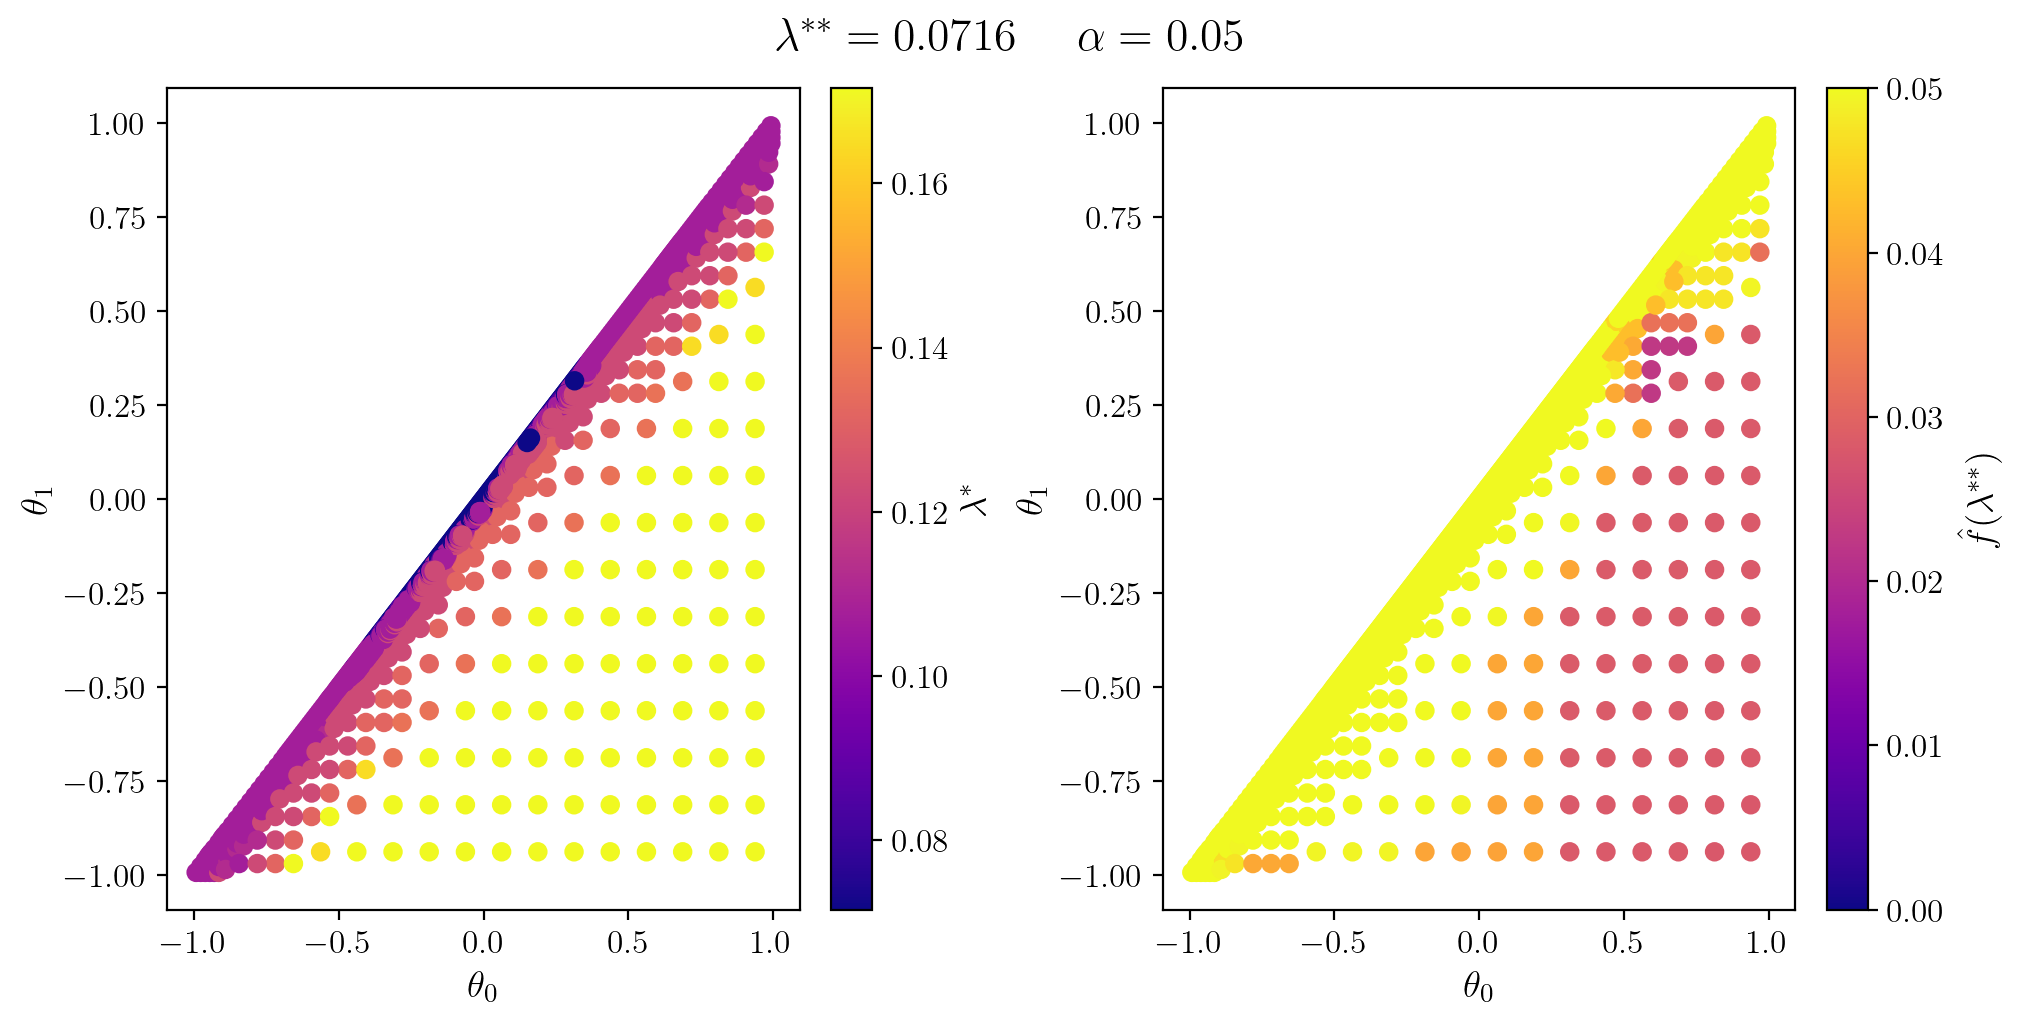

In [ ]:
plt.figure(figsize=(10, 5), constrained_layout=True)
plt.subplot(1, 2, 1)
plt.suptitle("$\lambda^{**} = " + f"{lamss:.4f} ~~~~ \\alpha = {alpha}$")
plt.scatter(df["theta0"], df["theta1"], c=df["lams"], vmin=lamss, vmax=lamss + 0.1)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.colorbar(label="$\lambda^*$")

plt.subplot(1, 2, 2)
plt.scatter(df["theta0"], df["theta1"], c=rej_df["tie_bound"], vmin=0, vmax=alpha)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.colorbar(label="$\hat{f}(\lambda^{**})$")
plt.show()

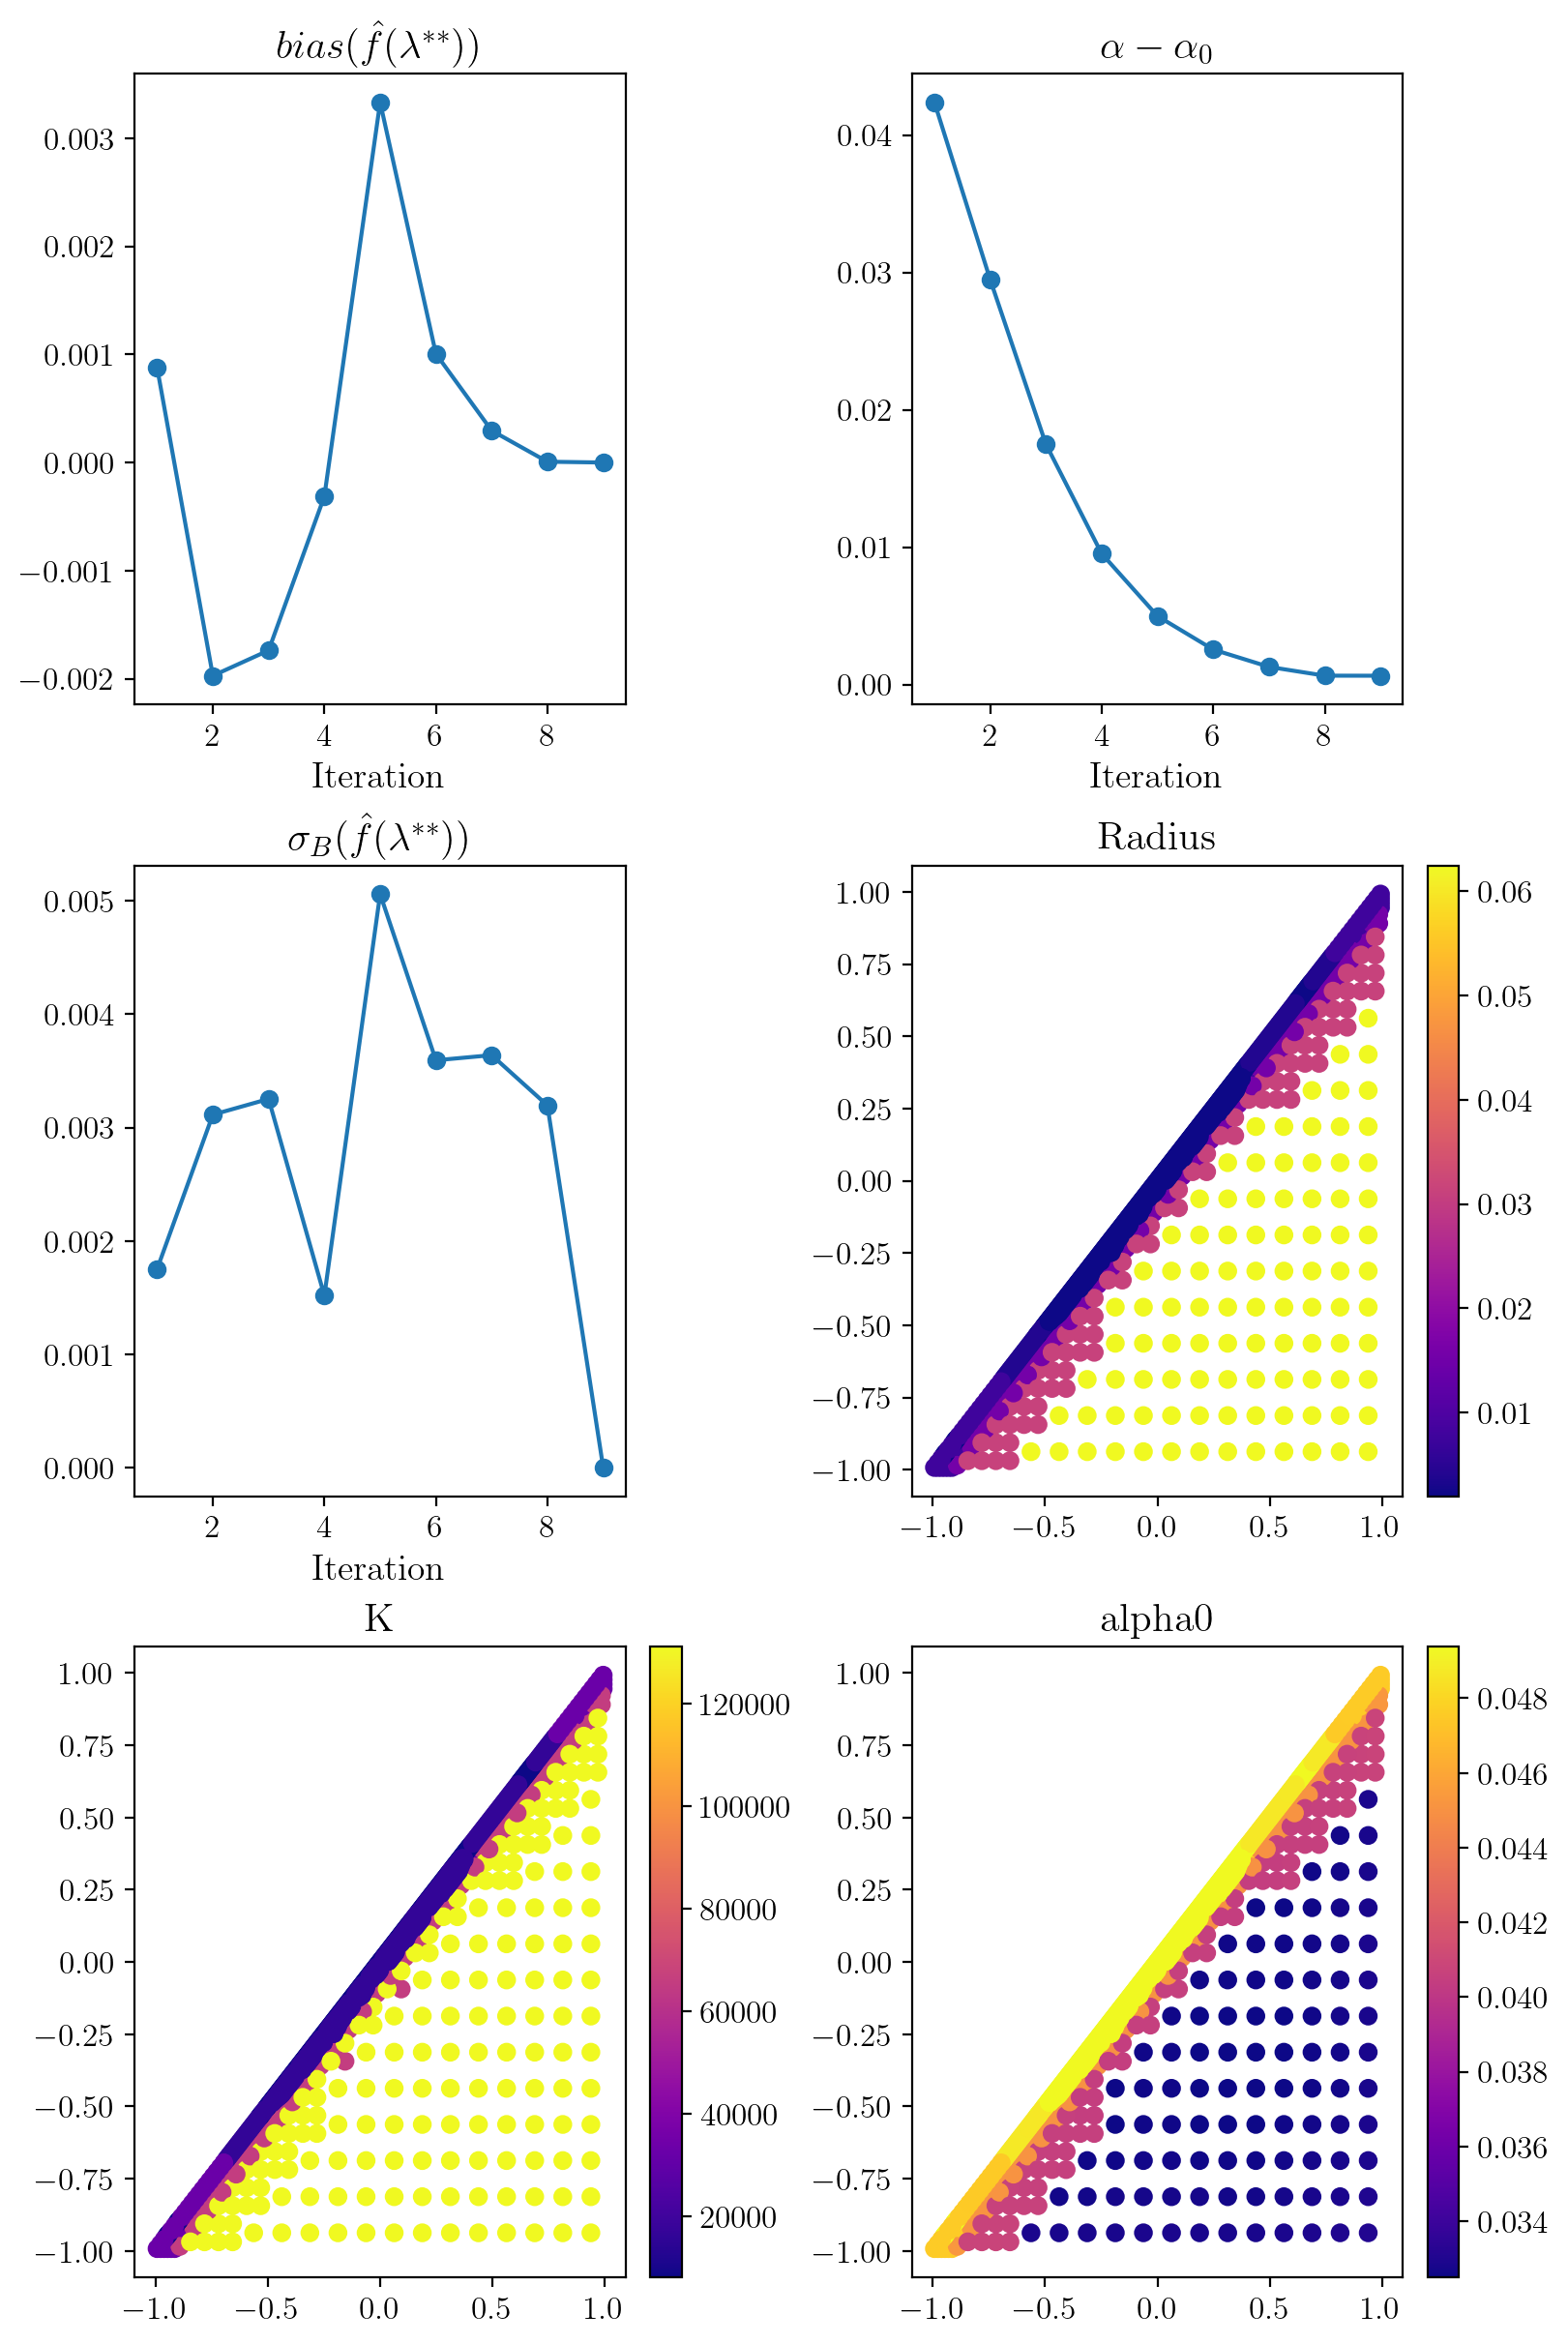

In [ ]:
import pandas as pd

evolution = pd.DataFrame(reports)
fig, ax = plt.subplots(3, 2, figsize=(8, 12), constrained_layout=True)
plt.subplot(3, 2, 1)
plt.plot(evolution["i"], evolution["bias_tie"], "o-")
plt.xlabel("Iteration")
plt.title(r"$bias(\hat{f}(\lambda^{**}))$")
plt.subplot(3, 2, 2)
plt.plot(evolution["i"], evolution["grid_cost"], "o-")
plt.xlabel("Iteration")
plt.title(r"$\alpha - \alpha_0$")
plt.subplot(3, 2, 3)
plt.plot(evolution["i"], evolution["std_tie"], "o-")
plt.xlabel("Iteration")
plt.title(r"$\sigma_{B}(\hat{f}(\lambda^{**}))$")
plt.subplot(3, 2, 4)
plt.scatter(df["theta0"], df["theta1"], c=df["radii0"])
plt.colorbar()
plt.title("Radius")
plt.subplot(3, 2, 5)
plt.scatter(df["theta0"], df["theta1"], c=df["K"])
plt.colorbar()
plt.title("K")
plt.subplot(3, 2, 6)
plt.scatter(df["theta0"], df["theta1"], c=df["alpha0"])
plt.colorbar()
plt.title("alpha0")
plt.show()

In [ ]:
lamss

0.07155548902535352

In [ ]:
def compare_tables(n, lam, lamss):
    successes = np.stack(
        np.meshgrid(np.arange(n + 1), np.arange(n + 1)), axis=-1
    ).reshape(-1, 2)
    possible_datasets = np.concatenate(
        (successes[:, None, :], n - successes[:, None, :]),
        axis=1,
    )

    boschloo = np.array(
        [
            scipy.stats.boschloo_exact(possible_datasets[i], alternative="less").pvalue
            for i in range(possible_datasets.shape[0])
        ]
    )
    barnard = np.array(
        [
            scipy.stats.barnard_exact(possible_datasets[i], alternative="less").pvalue
            for i in range(possible_datasets.shape[0])
        ]
    )
    tuned_fisher = np.array(
        [
            scipy.stats.fisher_exact(possible_datasets[i], alternative="less")[1]
            for i in range(possible_datasets.shape[0])
        ]
    )
    differences = np.where(
        ((boschloo < lam) != (tuned_fisher < lamss - 1e-12))
        | ((barnard < lam) != (tuned_fisher < lamss - 1e-12))
    )[0]
    return (
        possible_datasets[differences],
        boschloo[differences],
        boschloo[differences] < lam,
        barnard[differences],
        barnard[differences] < lam,
        tuned_fisher[differences],
        tuned_fisher[differences] < lamss - 1e-12,
    )


compare_tables(n, lam, lamss)

(array([[[ 0,  3],
         [15, 12]],
 
        [[ 1,  5],
         [14, 10]],
 
        [[ 5, 10],
         [10,  5]],
 
        [[10, 14],
         [ 5,  1]]]),
 array([0.05933533, 0.04945502, 0.04937112, 0.04945502]),
 array([False,  True,  True,  True]),
 array([0.04941523, 0.05009282, 0.04941523, 0.04248094]),
 array([ True, False,  True,  True]),
 array([0.11206897, 0.08429119, 0.07155549, 0.08429119]),
 array([False, False, False, False]))

In [ ]:
g_check = ip.cartesian_grid(
    [-1, -1], [1, 1], n=[1, 1], null_hypos=[ip.hypo("theta1 < theta0")]
)
K = 256
fisher_df = ip.validate(fisher.FisherExact, g_check, lam, K=K, model_kwargs=dict(n=n))
boschloo_df = ip.validate(
    fisher.BoschlooExact, g_check, lam, K=K, model_kwargs=dict(n=n)
)
barnard_df = ip.validate(fisher.BarnardExact, g_check, lam, K=K, model_kwargs=dict(n=n))
tuned_fisher_df = ip.validate(
    fisher.FisherExact, g_check, lamss, K=K, model_kwargs=dict(n=n)
)
print(f"n=8, fisher(0.05)={fisher_df['tie_est'].max()}")
print(f"n=8, boschloo(0.05)={boschloo_df['tie_est'].max()}")
print(f"n=8, barnard(0.05)={barnard_df['tie_est'].max()}")
print(f"n=8, tuned_fisher({lamss:5f})={tuned_fisher_df['tie_est'].max()}")
print(
    "max difference boschloo vs tuned fisher: ",
    np.abs(barnard_df["tie_est"] - boschloo_df["tie_est"]).max(),
)
print(
    "max difference barnard vs tuned fisher: ",
    np.abs(barnard_df["tie_est"] - boschloo_df["tie_est"]).max(),
)

NameError: name 'lam' is not defined